# Часть 2 задания Otus по теме "Визуализация", визуализация своего дата сета.

В качестве датасета использую данные, собранные при выполнении первого задания. Ибо что добру пропадать.   
Было собрано два дата сета:
1. Список фильмов из топ 500 по рейтингу кинопоиск 
2. Все фильмы из раздела "Награды" объединённые в единый дата сет. В этом дата сете фильм мог иметь повторения, если он был награждён в нескольких номинациях

Список собранных полей:
1. ID - id на кинопоиске;
2. Номинация - лучший сценарий, лучшая режисура, топ 500;
3. Название;
3. Страна - Может содержать несколько стран, разделенных запятой;
4. Бюджет - Может быть пустым, не везде указанно. В рублях, конвертация производилась на момент выполнения задания (в начале 2019 г.);
5. Сборы - Всё аналогично бюджету;
6. Рейтинг на Кинопоиск - может отсутствовать;
7. IMDB рейтинг - может отсутствовать.

Список исследуемых вопросов.
1. Какой процент фильмов окупился из тех, где данные указаны
2. Аналогичный вопрос по странам
3. Рейтинг по странам
4. Гистограма различий между рефтингами IMDB и Kinopoisk
5. Сравнительная гистограмма оценок между IMDB и Kinopoisk
6. Сравнение рейтинга между СССР и Россией


In [1]:
import pandas as pd

def get_unique_films(sets):
    result = pd.concat(sets)
    result = result.drop(columns=['reward'])
    result = result.drop_duplicates()
    result = result.reindex(columns=['id', 'name', 'country', 'budget', 'fees', 'kinopoisk_rating', 'imdb_rating'])
    result = result.reset_index()
    return result

best_five_hundreds = pd.read_csv('data/best_500.csv', delimiter=';')
best_rewards = pd.read_csv('data/rewards.csv', delimiter=';')
unique_films = get_unique_films([best_five_hundreds, best_rewards])
films_with_fee_data = unique_films[(unique_films['budget'] != 0) & (unique_films['fees'] != 0)]

# Выполнение пункта 1. Вычисление процента окупившихся фильмов из всего множества.

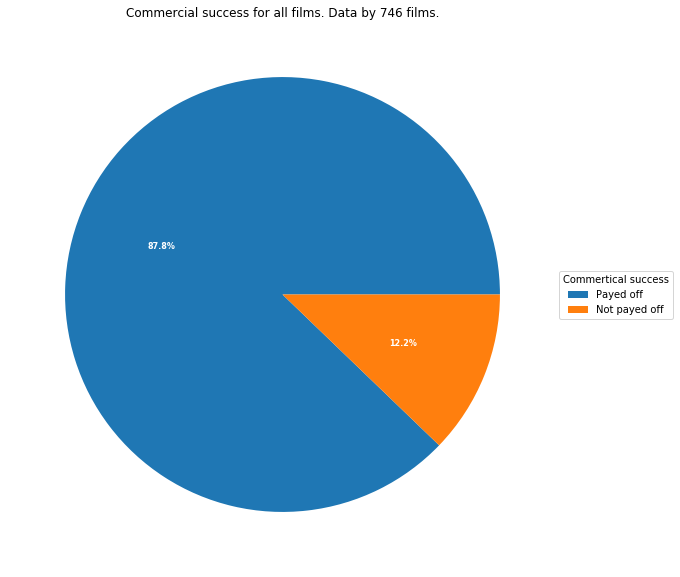

In [3]:
import matplotlib.pyplot as plt

def print_payed_off_diagram(frame, title):
    total_count = len(frame)
    payed_off = len(frame[frame['fees'] >= frame['budget']])
    payed_off_percent = payed_off / total_count
    not_payed_off_percent = (total_count - payed_off) / total_count

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

    data = [payed_off_percent, not_payed_off_percent]
    names = ['Payed off', 'Not payed off']


    def pie_label(pct):
        return "{:.1f}%".format(pct)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: pie_label(pct), textprops=dict(color="w"))

    ax.legend(wedges, names,
              title="Commertical success",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")

    ax.set_title("{0} Data by {1} films.".format(title, total_count))

    plt.show()
    return

print_payed_off_diagram(films_with_fee_data, 'Commercial success for all films.')

# Выполнение пункта 2 задания. Построить диаграмму окупаемости по станам.

Для начала выберем выведем список уникальных стран, датасеты которых содержат данные по бюджету и сборам.

In [4]:
def get_unique_contries_set(frame):
    countries = frame.get('country').tolist()
    unique_countries = []

    for country_list in countries:
        unique_countries += country_list.split(', ')

    return set(unique_countries)

unique_countries = get_unique_contries_set(films_with_fee_data)
print('There are countries in data set:')
print(unique_countries)

There are countries in data set:
{'Испания', 'Алжир', 'Швейцария', 'Греция', 'Панама', 'Польша', 'Люксембург', 'Тайвань', 'ОАЭ', 'Дания', 'Чехословакия', 'Ирландия', 'Канада', 'Финляндия', 'Бразилия', 'Франция', 'США', 'Индия', 'Мексика', 'Аргентина', 'Корея Южная', 'Великобритания', 'Мальта', 'Италия', 'Эстония', 'Чили', 'Австралия', 'СССР', 'Норвегия', 'Новая Зеландия', 'Исландия', 'Швеция', 'Австрия', 'Иран', 'Венгрия', 'Германия (ФРГ)', 'Марокко', 'Россия', 'Гонконг', 'Македония', 'Германия', 'Грузия', 'ЮАР', 'Нидерланды', 'Бельгия', 'Румыния', 'Япония', 'Китай', 'Ботсвана', 'Чехия'}


Выберем для исследования данные по Германии, СССР, России, США.

In [5]:
import re

def print_statistic_for_country(frame, country, title):
    filtered_frame = frame[frame.country.apply(lambda countries: re.match('.*{0}.*'.format(country), countries) != None)]
    print_payed_off_diagram(filtered_frame, title)
    return

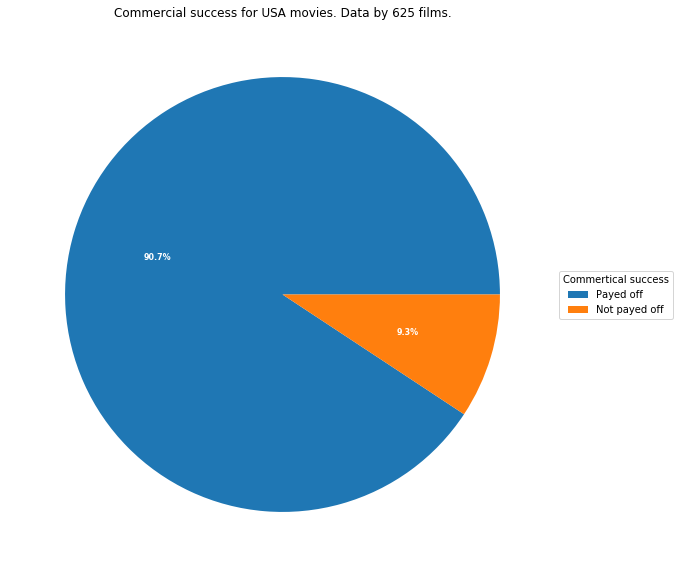

In [6]:
print_statistic_for_country(films_with_fee_data, 'США', 'Commercial success for USA movies.')

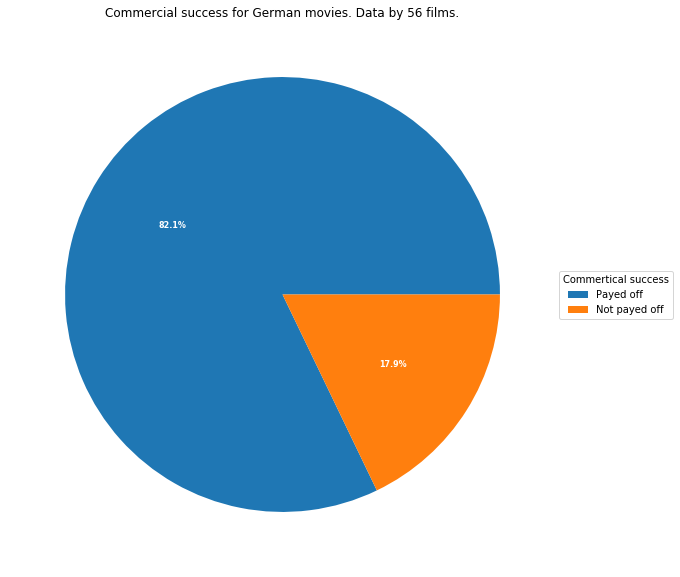

In [7]:
print_statistic_for_country(films_with_fee_data, 'Германия', 'Commercial success for German movies.')

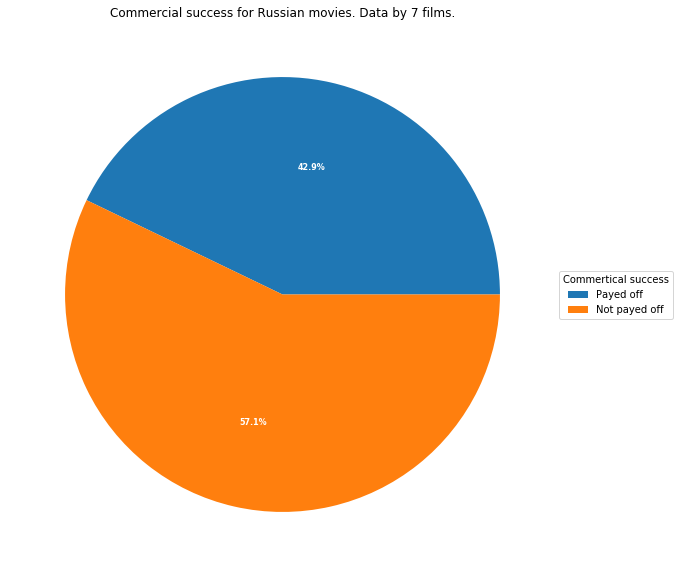

In [8]:
print_statistic_for_country(films_with_fee_data, 'Россия', 'Commercial success for Russian movies.')

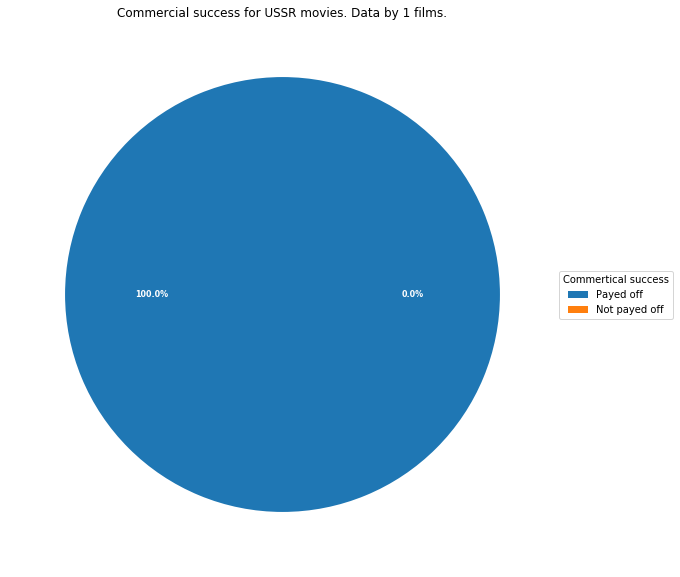

In [9]:
print_statistic_for_country(films_with_fee_data, 'СССР', 'Commercial success for USSR movies.')

Видим вполне очевидную картину - фильмы по большей части окупаются. Неудивительно. Ведь мы взяли множество фильмов в самыми лучшими рейтингами и имеющими награды на различных фестивалей.
Данные по СССР и России являются не репрезентативными. 
Попробуем посчитать статистику ля Франции, Великобритании и Испании.

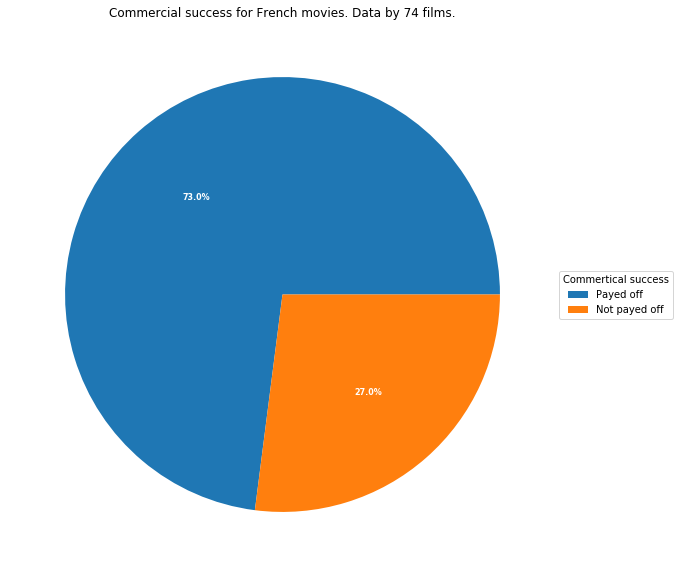

In [10]:
print_statistic_for_country(films_with_fee_data, 'Франция', 'Commercial success for French movies.')

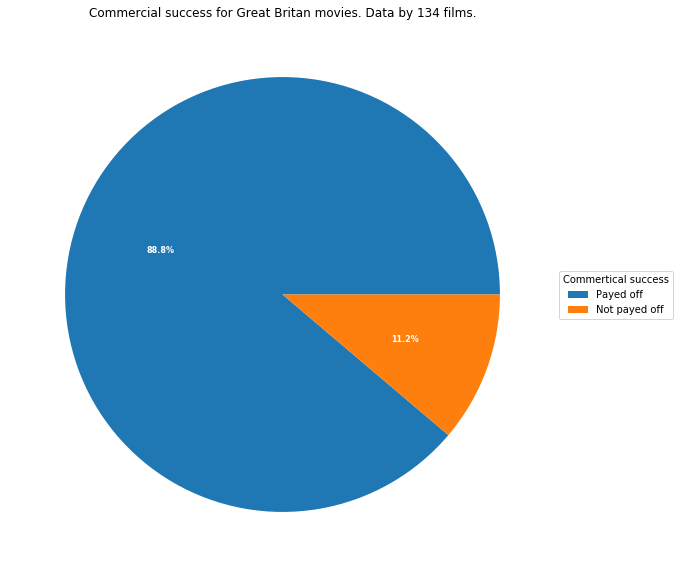

In [11]:
print_statistic_for_country(films_with_fee_data, 'Великобритания', 'Commercial success for Great Britan movies.')

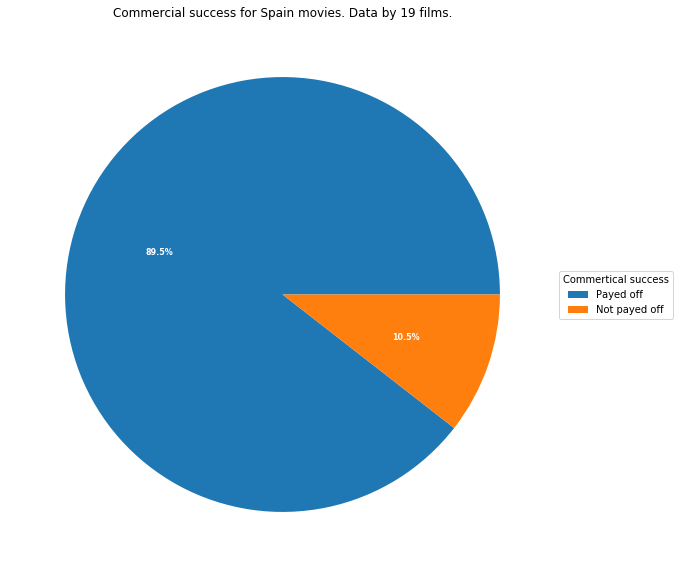

In [12]:
print_statistic_for_country(films_with_fee_data, 'Испания', 'Commercial success for Spain movies.')

# Выполнение пункта 3. Рейтинг по странам.

In [13]:
import re

def get_unique_contries_set(frame):
    countries = frame.get('country').tolist()
    unique_countries = []

    for country_list in countries:
        unique_countries += country_list.split(', ')

    return set(unique_countries)

def calculate_rating(frames, rating_field):
    # Учитываем только рейтинг > 0 Если рейтинг нулевой - значит оценки просто нет.
    return frames[frames[rating_field] > 0].get(rating_field).mean()

def filter_frame_by_country(frame, country):
    match_string = '.*{0}.*'.format(country)
    return frame[frame.country.apply(lambda countries: re.match(match_string, countries) != None)]

def calculate_rating_by_countries(frame, countries_set, treshold = 10):
    countries = []
    kinopoisk_rating = []
    imdb_rating = []
    for country in countries_set:
        frame_for_country = filter_frame_by_country(frame, country)
        if len(frame_for_country) > treshold:
            countries += [country]
            kinopoisk_rating += [calculate_rating(frame_for_country, 'kinopoisk_rating')]
            imdb_rating += [calculate_rating(frame_for_country, 'imdb_rating')]
    result = pd.DataFrame({'countries': countries, 'kinopoisk': kinopoisk_rating, 'imdb': imdb_rating})
    return result

unique_countries_set = get_unique_contries_set(unique_films)
rating_by_countries = calculate_rating_by_countries(unique_films, unique_countries_set, 5)

Третий параметр функции calculate_rating_by_countries это минимальное количество фильмов, которое должно быть у страны. Ведёт чтобы отсеять совсем уж редко встречающиеся страны.

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def print_statistic_by_countries(frame, title='Rating by countries'):
    kinopoisk = tuple(frame.get('kinopoisk').tolist())
    imdb = tuple(frame.get('imdb').tolist())
    countries = tuple(frame.get('countries').tolist())

    fig, ax = plt.subplots()

    index = np.arange(len(countries))
    bar_width = 0.4

    opacity = 0.4

    ax.bar(index, kinopoisk, bar_width,
           alpha=opacity, color='b',
           label='Kinopoisk rating')

    ax.bar(index + bar_width, imdb, bar_width,
           alpha=opacity, color='r',
           label='Imdb rating')

    ax.set_xlabel('Countries')
    ax.set_ylabel('Average rating')
    ax.set_title(title)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(countries)
    ax.legend()

    fig.tight_layout()
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.show()


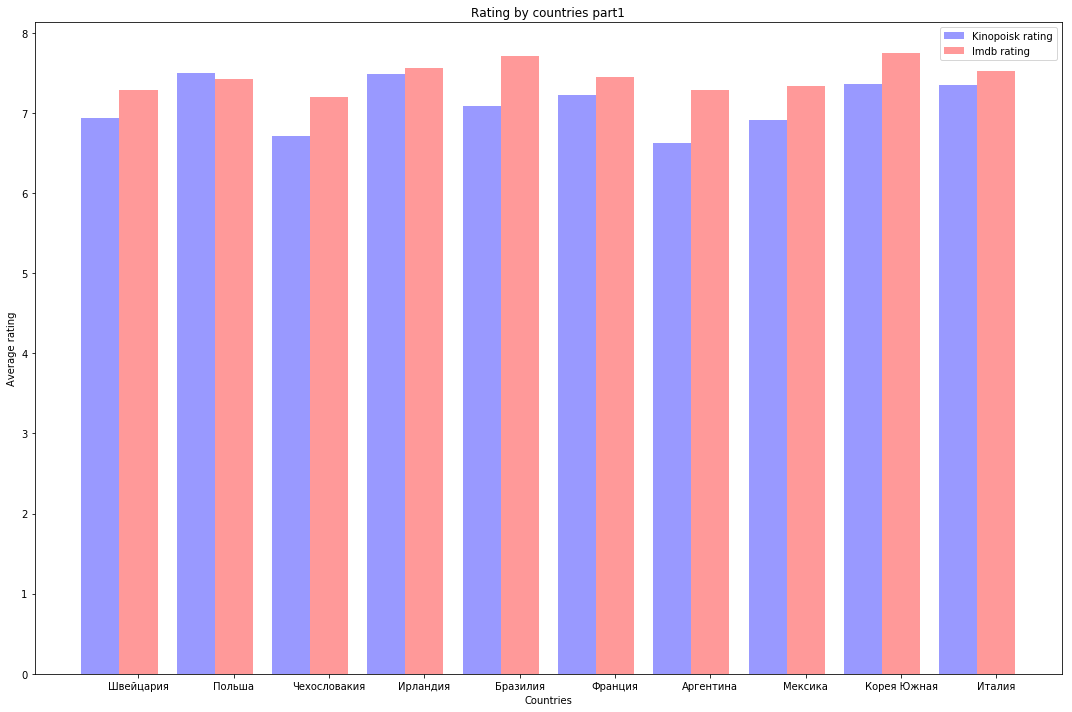

In [17]:
print_statistic_by_countries(rating_by_countries[0:10], 'Rating by countries part1')

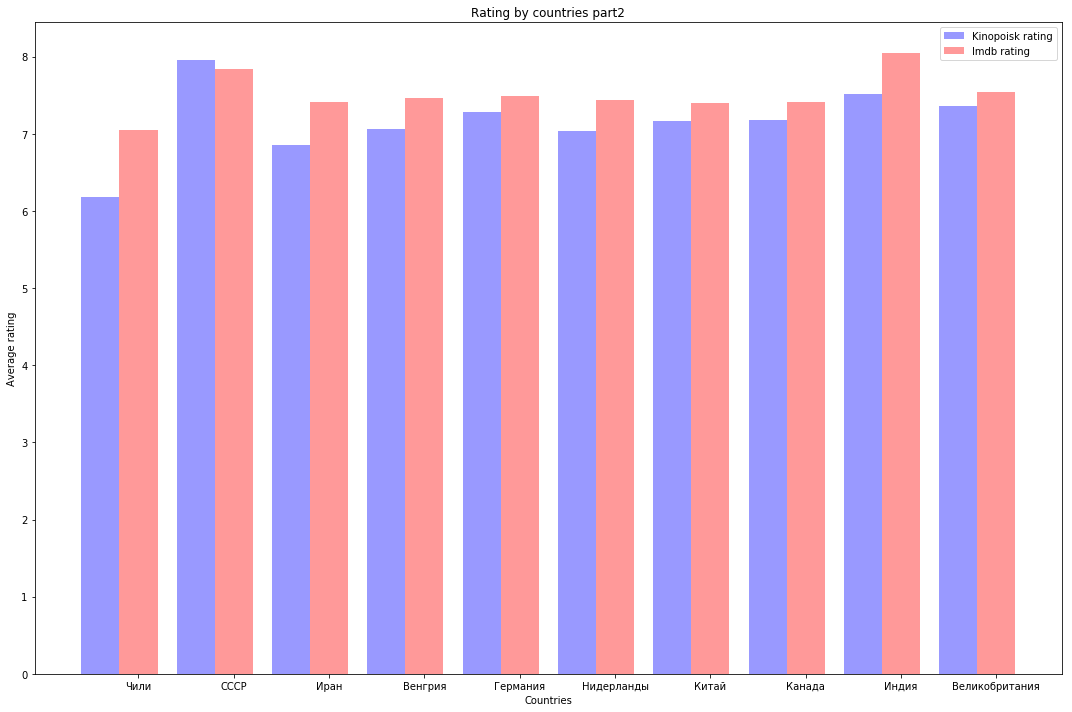

In [16]:
print_statistic_by_countries(rating_by_countries[10:20], 'Rating by countries part2')

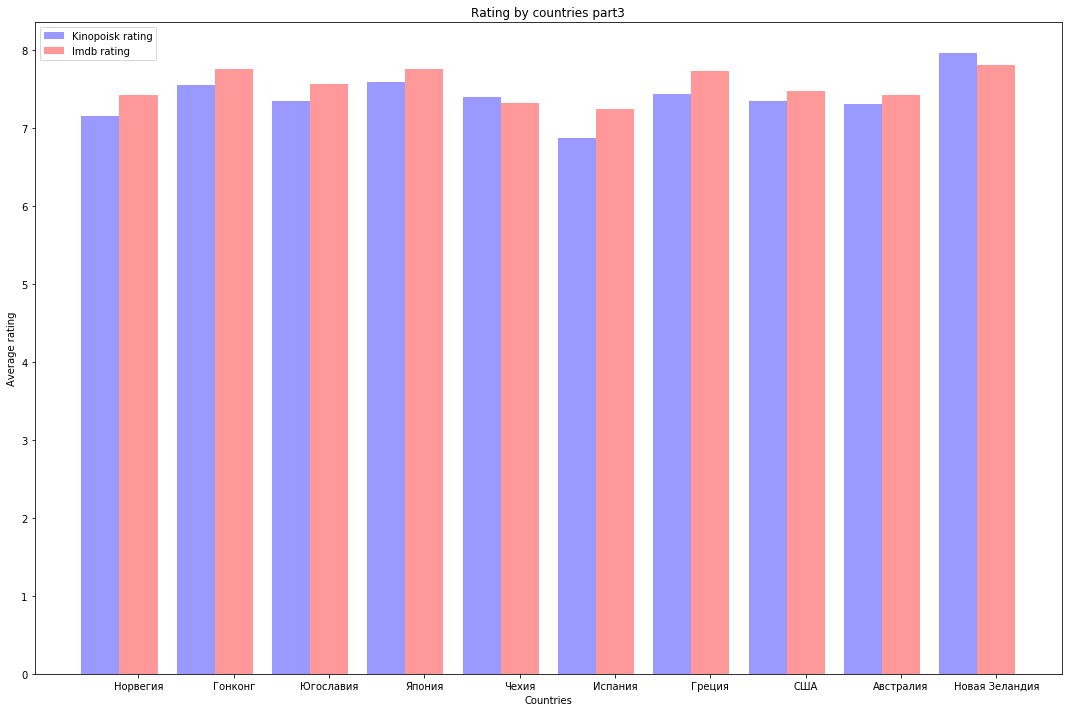

In [18]:
print_statistic_by_countries(rating_by_countries[20:30], 'Rating by countries part3')

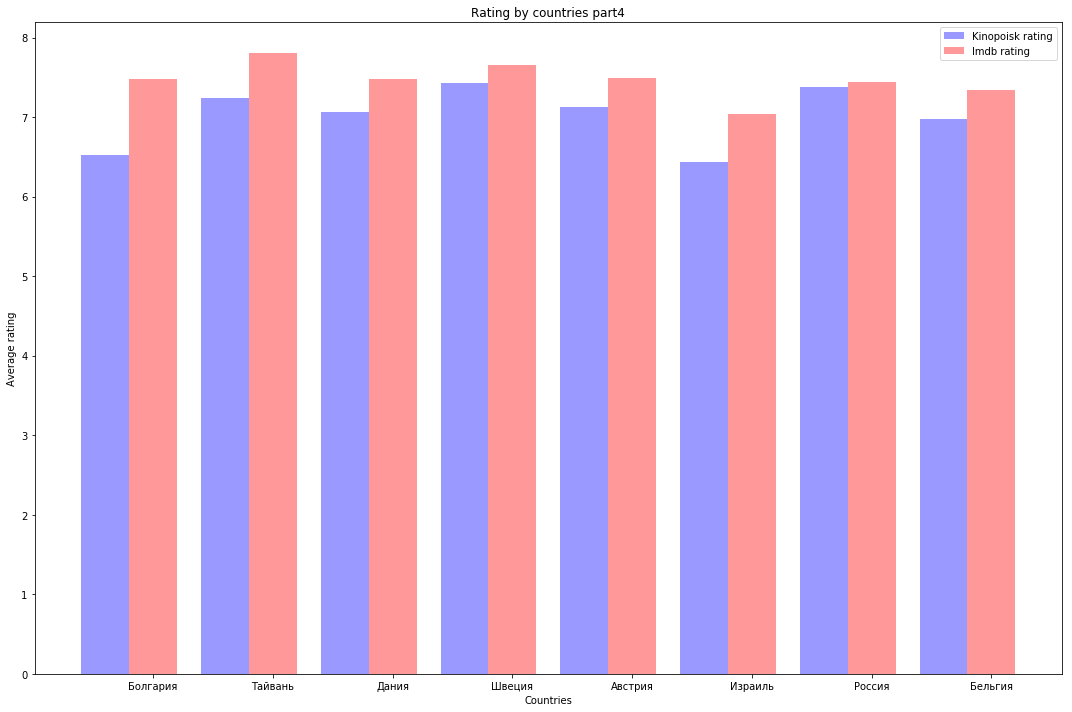

In [19]:
print_statistic_by_countries(rating_by_countries[30:-1], 'Rating by countries part4')

Из графиков видно что вкусовые предпочтения русских зрителей практически совпадают с мировыми. В рейтингах только для некоторых стран (Аргентина, Чехия, Тайвань, Турция, Израиль, Швейцария) вероятно это объясняется меньшим количеством людей, участвовавших в голосовании в России. При этом разница не является драматичкской.
Вероятно графики имеют подобный вид потому, что дата сет - самые награждаемые фильмы. Скорее всего они и правда высокого качества и нравятся многим людям, вне зависимости от национальности, вероисповедния, возраста.
Можно предположить что если бы мы сравнивали независимое кино, то наблюдали бы гораздо большушю разницу. Т.К. оно часто снимается для внутреннего рынка, чтобы поднять острые вопросы внутри страны или в самобытном стиле.


# Выполнение пункта 4. Гистограма различий между рефтингами IMDB и Kinopoisk.

Чтобы подтвердить теорию о том что разница незначительная - построим гистограму различий между рейтингом IMDB и Kinopoisk

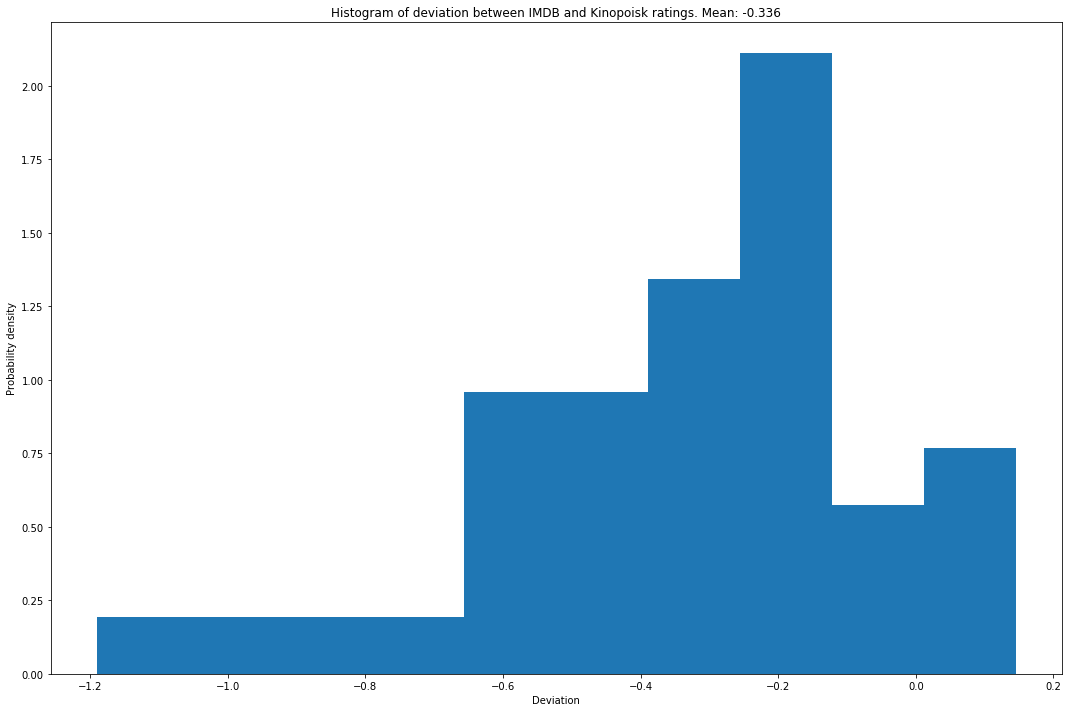

In [20]:
import numpy as np
import matplotlib.pyplot as plt

deviations = []
for i, row in rating_by_countries.iterrows():
    deviations += [row['kinopoisk'] - row['imdb']]
    
def print_deviations_histogram(devirations, num_bins=10):
    fig, ax = plt.subplots()
    
    n, bins, patches = ax.hist(deviations, num_bins, density=1)
    mean = round(np.mean(deviations), 3)
    ax.set_xlabel('Deviation')
    ax.set_ylabel('Probability density')
    ax.set_title(r'Histogram of deviation between IMDB and Kinopoisk ratings. Mean: {0}'.format(mean))

    fig.tight_layout()
    plt.show()

print_deviations_histogram(deviations, 10)

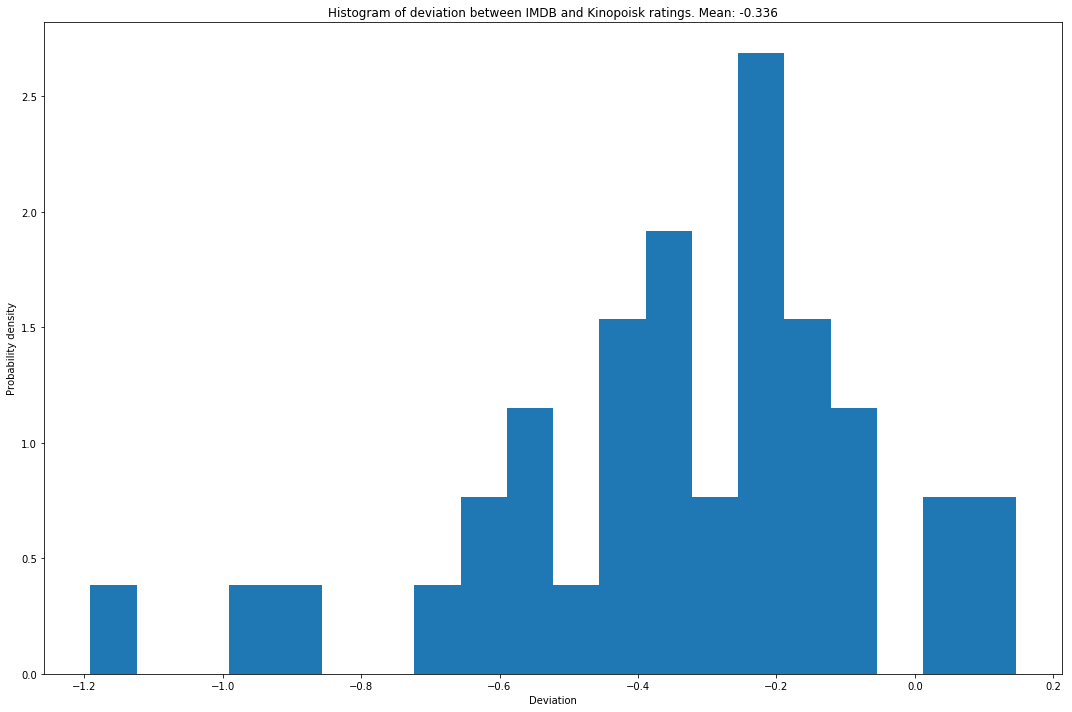

In [21]:
print_deviations_histogram(deviations, 20)

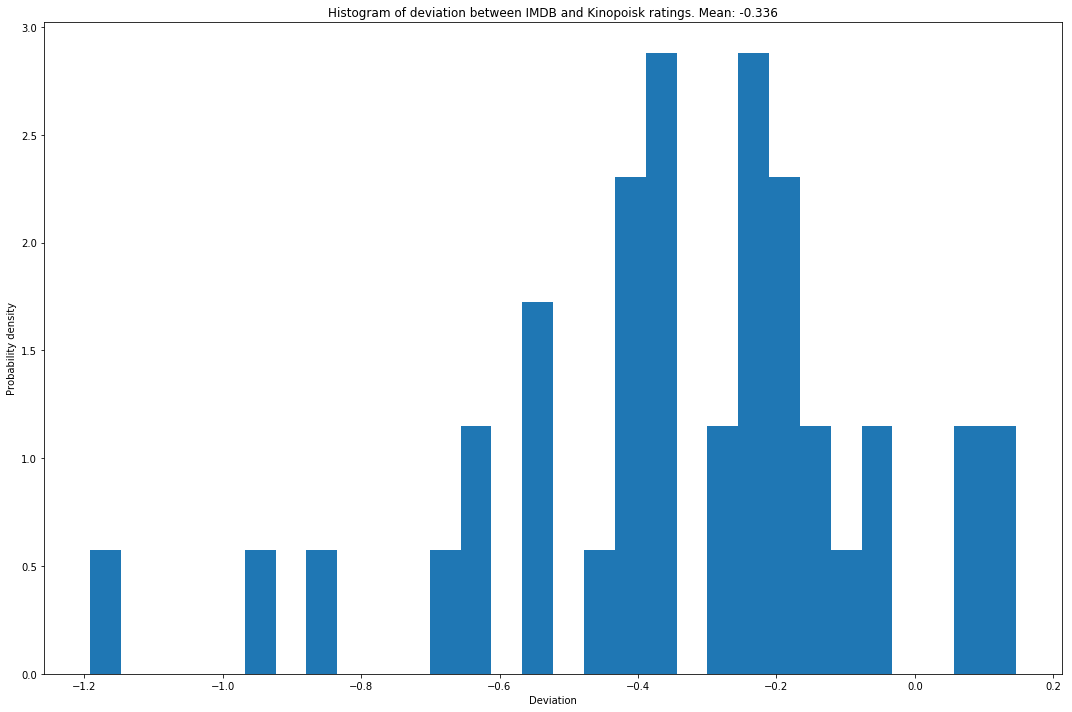

In [22]:
print_deviations_histogram(deviations, 30)

Данных не очень много, однако при построении гистограмы, видно что отклонение выстраивается в приблизительно нормальном распределении. Таким образом можно заключить что разница между рейтингами Kinopoisk и IMDB является случайнойн.
Второй вывод из иаграммы - что оценки фильмов на Kinopoisk слегка ниже чем.

# Выполнение пункта 5. Сравнительная гистограмма оценок между IMDB и Kinopoisk

Total films count: 1877


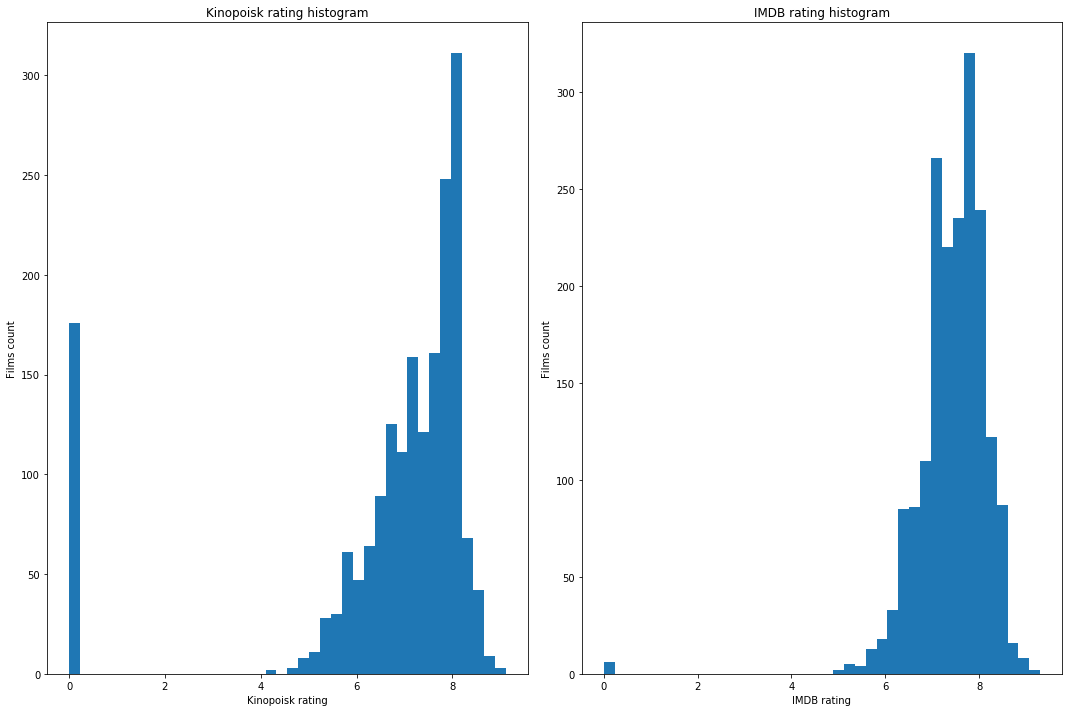

In [23]:
import matplotlib.pyplot as plt

from matplotlib.ticker import PercentFormatter

def print_rating_histograms(frame, num_bins=40):
    kinopoisk = frame.get('kinopoisk_rating').tolist()
    imdb = frame.get('imdb_rating').tolist()
    
    fig, ax = plt.subplots(1, 2)
    
    ax[0].hist(kinopoisk, num_bins)
    
    ax[0].set_xlabel('Kinopoisk rating')
    ax[0].set_ylabel('Films count')
    ax[0].set_title(r'Kinopoisk rating histogram')
    
    ax[1].hist(imdb, num_bins)
    
    ax[1].set_xlabel('IMDB rating')
    ax[1].set_ylabel('Films count')
    ax[1].set_title(r'IMDB rating histogram')
    
    fig.tight_layout()
    plt.show()

print('Total films count: {0}'.format(len(unique_films)))
print_rating_histograms(unique_films)

Приведённые выше диаграммы показывают что на Kinopoisk оценки фильмов в среднем немного ниже. Диаграмма IDMB ближе к нормальному распределению. Вероятно потмоу, что данных существенно больше и участвуют люди со всего мира.
Гистрограма Kinopoisk имеет аномалию  - порядка 175 фильмов не имеют оченки. Скорее всего речь идёт малопопулярных в России кинопроизведениях.

# Выполнение пункта 6. Сравнение рейтинга между СССР и Россией.

  countries  kinopoisk      imdb  films_count
0      СССР   7.956331  7.845865          133



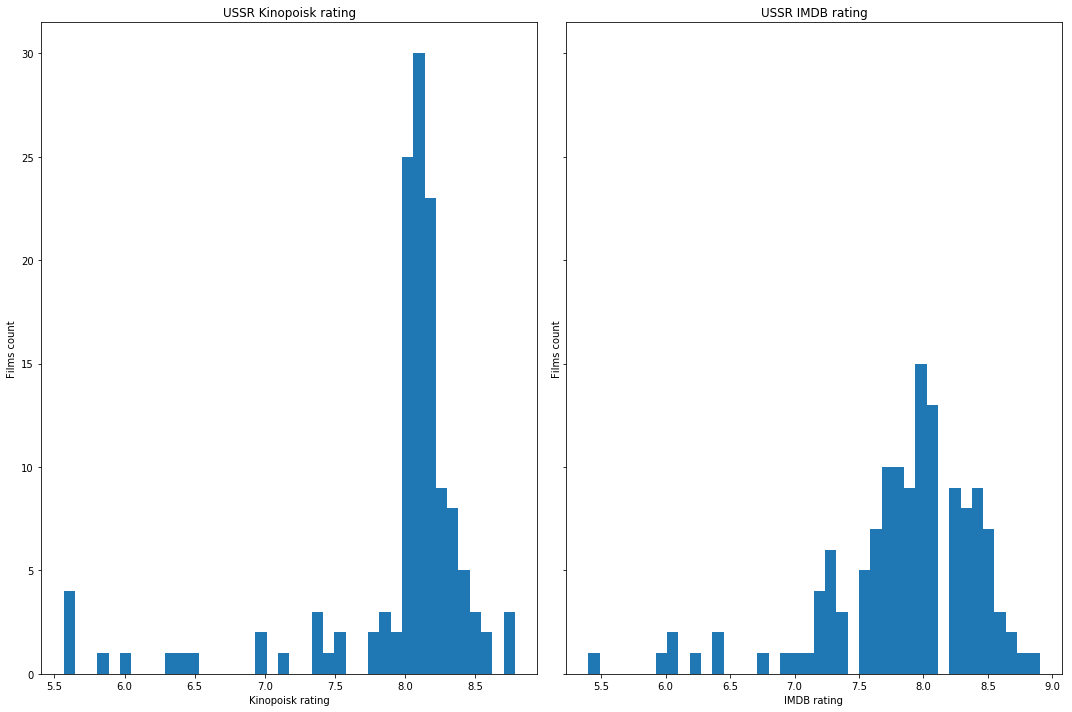

  countries  kinopoisk      imdb  films_count
0    Россия   7.374138  7.434483           30



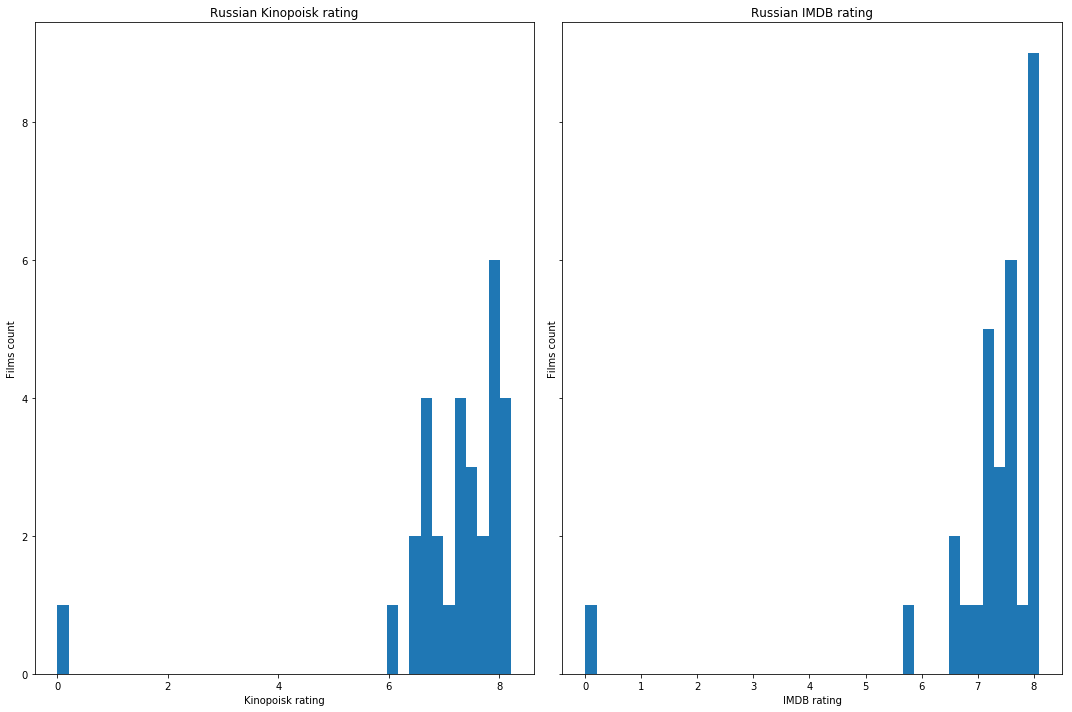

In [159]:
import re

def calculate_rating(frames, rating_field):
    # Учитываем только рейтинг > 0 Если рейтинг нулевой - значит оценки просто нет.
    return frames[frames[rating_field] > 0].get(rating_field).mean()

def filter_frame_by_country(frame, country):
    match_string = '.*{0}.*'.format(country)
    return frame[frame.country.apply(lambda countries: re.match(match_string, countries) != None)]

def calculate_average_ratings(frame, countries_set):
    countries = []
    kinopoisk_rating = []
    imdb_rating = []
    films_count = []
    for country in countries_set:
        frame_for_country = filter_frame_by_country(frame, country)
        countries += [country]
        kinopoisk_rating += [calculate_rating(frame_for_country, 'kinopoisk_rating')]
        imdb_rating += [calculate_rating(frame_for_country, 'imdb_rating')]
        films_count += [len(frame_for_country)]
    result = pd.DataFrame({'country': countries, 'kinopoisk_avg': kinopoisk_rating, 'imdb_avg': imdb_rating, 'films_count': films_count})
    return result

def print_rating_histograms(frame, country_name, country_title, num_bins=40):
    filtered_frame = filter_frame_by_country(frame, country_name)
    kinopoisk_rating = filtered_frame.get('kinopoisk_rating').tolist()
    imdb_rating = filtered_frame.get('imdb_rating').tolist()

    print(calculate_rating_by_countries(frame, [country_name]))
    
    print()
    fig, ax = plt.subplots(1, 2, sharey=True)

    ax[0].hist(kinopoisk_rating, num_bins)

    ax[0].set_xlabel('Kinopoisk rating')
    ax[0].set_ylabel('Films count')
    ax[0].set_title(r'{0} Kinopoisk rating'.format(country_title))

    ax[1].hist(imdb_rating, num_bins)

    ax[1].set_xlabel('IMDB rating')
    ax[1].set_ylabel('Films count')
    ax[1].set_title(r'{0} IMDB rating'.format(country_title))

    fig.tight_layout()
    plt.show()

print_rating_histograms(unique_films, 'СССР', 'USSR')
print_rating_histograms(unique_films, 'Россия', 'Russian')

Очевидно что сравнивать рейтинги СССР и России не совсем корректно. Количество фильмов в выборках отличается ~4 раз. Однако некоторые выводы можно сделать. Наверное дело в том что в СССР производилось гораздо больше фильмов. Ну и в целом он существовал дольше чем РФ.
Во - первых фильмы имеют по большей части хорошую оценку.
Во - вторых фильмы снфтые СССР оценены достаточно высоко в мире. Следовательно несмотря на цензуру и склонность к проплаганде людям удавалось снимать отличные фильмы. Русская земля богата талантливыми людьми.
В - третьих. Если сравнить распределения рейтингов IMDB и Kinopoisk фильмов снятых в СССР, то мы увидим что на Kinopoisk фильмы имеют бобльшую оценку.
Наверное это связанно в тем что фильмы СССР прежде всего снимались для внутреннего потребителя. Они затрагивали важные для наших людей проблемы и "Культурно" более близки Русским людям.